# Simulated Annealing applyed to Three-hump camel function

$
f(x,y) = 2x^2 - 1.05x^4 + \frac{x^6}{6} + xy + y^2
$

In [2]:
import math
import random
import numpy as np

# Define the initial solution
def initial_solution():
    return [random.uniform(-5, 5) for _ in range(2)]

# Define the objective function
def objective_function(x, y):
    return 2*x**2 - 1.05*x**4 + x**6/6 + x*y + y**2

# Define the initial temperature
def initial_temperature(acceptance_probability):
    delta_e = []
    for _ in range(100):
        random_solution1 = initial_solution()
        random_solution_value1 = objective_function(random_solution1[0], random_solution1[1])
        random_solution2 = initial_solution()
        random_solution_value2 = objective_function(random_solution2[0], random_solution2[1])
        delta_e.append(abs(random_solution_value2 - random_solution_value1))
    
    return -np.mean(delta_e) / np.log(acceptance_probability)


# Define the acceptance probability
def acceptance_probability(delta_e, temperature):
    return math.exp(-delta_e / temperature)

# Define cooling schedule
def cooling_schedule(temperature, cooling_rate):
    return temperature * cooling_rate

Initial solution: -4.38746797297353, -4.282812181545237
Initial objective: 875.4122518067118
Initial temperature: 511.77634635119387

Current solution: -1.708149550077842, -1.307174610816189
Current objective: 4.978059946265683
Current temperature: 460.5987117160745

Current solution: 1.7317630502979087, -0.9523579234517074
Current objective: 0.30752845124816885
Current temperature: 414.53884054446706

Current solution: 0.7787914637899827, 1.6975557313113068
Current objective: 5.067700427319792
Current temperature: 373.0849564900204

Current solution: 3.539869074365912, 1.2176663012874749
Current objective: 193.90883230297112
Current temperature: 335.7764608410183

Current solution: 0.9072670556676081, 3.8961626200887784
Current objective: 19.74273614064036
Current temperature: 302.1988147569165

Current solution: -0.9676678830406913, 3.7479789467377085
Current objective: 11.509497488574365
Current temperature: 271.97893328122484

Current solution: -3.122735902774399, 6.050571293147665

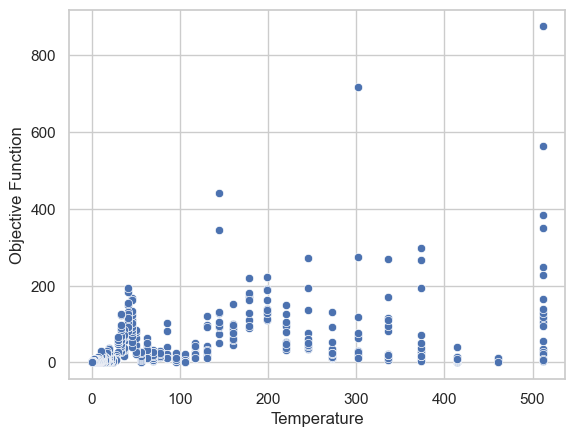

In [13]:
import re, seaborn as sns

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

temp = initial_temperature(0.5)
min_temp = 0.0001
x, y, z, temp_list = [], [], [], []

current_solution = initial_solution()
current_objective = objective_function(current_solution[0], current_solution[1])
best_solution = current_solution
best_objective = current_objective
pertubations_accepted = 0
x.append(current_solution[0])
y.append(current_solution[1])
z.append(current_objective)
temp_list.append(temp)
print(f'Initial solution: {current_solution[0]}, {current_solution[1]}\nInitial objective: {current_objective}\nInitial temperature: {temp}\n')
while temp >= min_temp:
    while pertubations_accepted < 25:
        disturbance = [random.uniform(-1, 1) for _ in range(2)]
        new_solution = [current_solution[i] + disturbance[i] for i in range(len(current_solution))]
        new_objective = objective_function(new_solution[0], new_solution[1])

        delta_e = new_objective - current_objective
        if delta_e < 0:
            current_solution = new_solution
            current_objective = new_objective
            pertubations_accepted += 1
            if current_objective < best_objective:
                best_solution = current_solution
                best_objective = current_objective
                
                x.append(current_solution[0])
                y.append(current_solution[1])
                z.append(current_objective)
                temp_list.append(temp)
        else:
            if random.uniform(0,1) < acceptance_probability(delta_e, temp):
                current_solution = new_solution
                current_objective = new_objective
                pertubations_accepted += 1
                x.append(current_solution[0])
                y.append(current_solution[1])
                z.append(current_objective)
                temp_list.append(temp)

    temp = cooling_schedule(temp, 0.9)
    pertubations_accepted = 0
    print(f'Current solution: {current_solution[0]}, {current_solution[1]}\nCurrent objective: {current_objective}\nCurrent temperature: {temp}\n')

print(f'Best solution: {best_solution[0]}, {best_solution[1]}\nBest objective: {best_objective}')
'''fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

cmap = cm.get_cmap('jet')

ax.scatter(x, y, z, c=temp_list, cmap=cmap)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()
plt.savefig('simulated-annealing.png')'''
sns.set_theme(style="whitegrid")
ax = sns.scatterplot(x=temp_list, y=z)
ax.set_xlabel('Temperature')
ax.set_ylabel('Objective Function')
plt.savefig('simulated-annealing1.png')